# Experiment on the Topic of Speechstyles
Luise Haubenreiser

First project of working with Python and packages (Pandas, Numpy, Audformat, Opensmile, Sklearn, Matplotlib) as well as Java and the tool Speechalyzer in order to analyze  the voice data of a target speaker.

1. Prepare audio file for analysis: wav, 16kHz, 16bit, PCM
2. Identify speaking styles, define categories
3. Segment and annotate data -- Possible tool: Speechalyzer
4. Import segmented data into pandas table
5. Write / apply analysis scripts
6. Perform analyses on pitch, intensity, voice quality, hnr, speech rate and pauses

I have chosen a recording by Hildegard Knef in which she performs the 1930 play "La voix humaine" by Jean Cocteau. After a long-term relationship, a woman has been left by her partner. From the snippets of the repeatedly interrupted telephone conversations with him, the picture of a broken relationship, its structures and sensitivities emerges. Taking advantage of the peculiarities of the medium telephone, she first tries to deceive her counterpart. Her feigned strength and busyness are just as much attempts to win him back as the gradually visible fear, her despair or the evocative memories of the supposedly happy shared past. 

### Shortcuts for Jupyter (small reminder for myself):
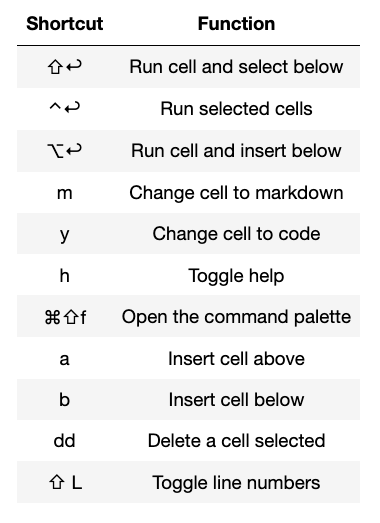

Now onto the real project. Searching for the correct audiofile - Renaming it.

In [1]:
audiofile = "DieGeliebteStimme"

### Collecting all the necessary imports:

In [2]:
import pandas as pd
import parselmouth
from parselmouth import praat
mysp=__import__("my-voice-analysis")
import sys
sys.path.append("/Users/luisehaubenreiser/indivsprech/s_indivsprech/mld/src")
import midlevel_descriptors as mld
import os
import glob
import IPython
import asr as speechrec
import opensmile
import nltk
import text_features as tf
import midlevel_descriptors as mld
import seaborn as sns

### Working with Parselmouth in order to start a first analysis of the unsegmented sound. 

First, define the file you will be working with:

In [3]:
myfile = '/Users/luisehaubenreiser/indivsprech/s_indivsprech/DieGeliebteStimme_16_LuiseHaubenreiser_verst.wav'
sound = parselmouth.Sound(myfile) 

Extracting general sound characteristics, such as amplitude or sampling rate:

In [4]:
print(sound)

Object type: Sound
Object name: <no name>
Date: Tue Aug 31 01:41:14 2021

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 300.9088125 seconds
   Total duration: 300.9088125 seconds
Time sampling:
   Number of samples: 4814541
   Sampling period: 6.25e-05 seconds
   Sampling frequency: 16000 Hz
   First sample centred at: 3.125e-05 seconds
Amplitude:
   Minimum: -0.812866211 Pascal
   Maximum: 0.812652588 Pascal
   Mean: -0.000413837971 Pascal
   Root-mean-square: 0.0420030338 Pascal
Total energy: 0.530879831 Pascal² sec (energy in air: 0.00132719958 Joule/m²)
Mean power (intensity) in air: 4.41063712e-06 Watt/m² = 66.45 dB
Standard deviation in channel 1: 0.0420009994 Pascal



Defining the parameters for the formant analysis:

In [5]:
f0min=75
f0max=300
pointProcess = praat.call(sound, "To PointProcess (periodic, cc)", f0min, f0max)
formants = praat.call(sound, "To Formant (burg)", 0.0025, 5, 5000, 0.025, 50)
numPoints = praat.call(pointProcess, "Get number of points")
f1_list = []
f2_list = []
f3_list = []
for point in range(0, numPoints):
    point += 1
    t = praat.call(pointProcess, "Get time from index", point)
    f1 = praat.call(formants, "Get value at time", 1, t, 'Hertz', 'Linear')
    f2 = praat.call(formants, "Get value at time", 2, t, 'Hertz', 'Linear')
    f3 = praat.call(formants, "Get value at time", 3, t, 'Hertz', 'Linear')
    f1_list.append(f1)
    f2_list.append(f2)
    f3_list.append(f3)

Extracting the formant features:

In [6]:
print(formants)

Object type: Formant
Object name: untitled
Date: Tue Aug 31 01:41:32 2021

Time domain:
   Start time: 0 seconds
   End time: 300.9088125 seconds
   Total duration: 300.9088125 seconds
Time sampling:
   Number of frames: 120344
   Time step: 0.0025 seconds
   First frame centred at: 0.025656250000025693 seconds



Taking a look at the formant values for the first formant:

In [7]:
f1_list

[541.5868310629734,
 320.2511149814133,
 311.2965112603256,
 313.28185286500843,
 316.3990687536684,
 309.62422356804854,
 305.8162985790308,
 305.58447162329253,
 306.8333362025076,
 309.1298272290772,
 312.9181785520167,
 312.6988900758419,
 307.18573111328317,
 314.54540182912245,
 365.1200365656181,
 419.25523539884034,
 435.1460066933136,
 533.4958043847296,
 1281.4930730415238,
 1366.516437064981,
 1362.8980276464545,
 1007.9927657682379,
 1055.0195564493654,
 287.1975509921363,
 286.64817322786473,
 275.1383401554461,
 274.610114879924,
 278.59537921041857,
 282.40660465675654,
 284.1397747543483,
 282.8281850542379,
 292.1086797956108,
 301.5710545767948,
 206.3944990488234,
 1425.0439511052418,
 1146.677710647226,
 402.46024252994243,
 887.3345166712342,
 344.91510946957396,
 284.576835240434,
 274.3143575999815,
 291.18194008816374,
 284.78205027203273,
 287.21987069315645,
 298.5774045485573,
 300.9856038710677,
 313.5790461168184,
 314.76096953164244,
 322.06734096263756,
 

### Working with My Voice Analysis

After given the audiofile title and the path to the corresponding directory, My Voice Analysis provides information of the speaker's gender, the mood of speech and the p-value/sample size.

In [8]:
p="DieGeliebteStimme_44116_LuiseHaubenreiser_verst"
c=r"/Users/luisehaubenreiser/indivsprech/s_indivsprech/experaudio_myvoice" 
mysp.myspgend(p,c)

[]
a female, mood of speech: Reading, p-value/sample size= :0.00 5


My Voice Analysis is also capable of an overall analysis, extracting information such as the number of syllables and pauses, articulation and speech rate, duration of speech in comparison to the original duration and f0 values.

In [9]:
mysp.mysptotal(p,c)

[]
                           0
number_ of_syllables     549
number_of_pauses          90
rate_of_speech             2
articulation_rate          6
speaking_duration       98.9
original_duration      300.9
balance                  0.3
f0_mean               203.85
f0_std                 76.48
f0_median              190.8
f0_min                    71
f0_max                   420
f0_quantile25            146
f0_quan75                257


### Working with OpenSmile

#### Mid Level Descriptors
Using Uwe Reichelts Script for MLDs, this project works with Opensmile by audeering.
Opensmile is an audio extractor which works with frames of 10-25 milliseconds overlapping each other by about 5 ms, so that speech can be treated as being static, not dynamic.
The first step is a fourier analysis. Using the hamming windows, the mid level descriptor focuses the frames of a single segment and counts the syllables within them. It does this by looking at f0 curves; a lot of energy points to a lot of sonorance and thus indirectly to a syllable nucleus.

In [10]:
pwd

'/Users/luisehaubenreiser/indivsprech/s_indivsprech'

Any object in Python can be pickled so that it can be saved on disk. What pickle does is that it “serializes” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script. After preparing the pickle in an external notebook, I can now unpack it here:

In [11]:
df_geliebte = pd.read_pickle('/Users/luisehaubenreiser/indivsprech/s_indivsprech/Haubereiser_mdf.pkl')

Adding a path to the file:

In [12]:
def rel_path(x):
    return os.path.basename(x)
df_geliebte['segmented_file'] = df_geliebte['segmented_file'].apply(lambda x: 'audio/'+os.path.basename(x))

In [13]:
df_geliebte = df_geliebte.set_index(df_geliebte.segmented_file) #nutzt spalte als index

Possible intermediate step that is not mandatory for further analysis: Removing the unnecessary columns.

In [14]:
df_geliebte = df_geliebte.drop(columns=['segmented_file', 'channel']) #nicht unbedingt nötig, aber möglich

In [15]:
df_geliebte.head() #show first rows

""
segmented_file
audio/Die-Geliebte_Haubereiser_seg_00000000.wav
audio/Die-Geliebte_Haubereiser_seg_00000001.wav
audio/Die-Geliebte_Haubereiser_seg_00000002.wav
audio/Die-Geliebte_Haubereiser_seg_00000003.wav
audio/Die-Geliebte_Haubereiser_seg_00000004.wav


A quick check by listening to the audio:

In [16]:
IPython.display.Audio('audio/Die-Geliebte_Haubereiser_seg_00000000.wav')

The mid-level descriptors are extracted:

In [17]:
fex_mld = mld.MLD()
mld_df = fex_mld.extract_from_index(index=df_geliebte, cache_path='./tmp/mld')

In [18]:
df_geliebte.shape

(58, 0)

In [19]:
mld_df.shape #indicates the dimensions of the table

(57, 580)

In [20]:
mld_df.head(5)

,hld_sylRate,hld_gapRel,hld_nSyl,lld_voicingFinalUnclipped_sma_diff,lld_voicingFinalUnclipped_sma_end,lld_voicingFinalUnclipped_sma_iqr,lld_voicingFinalUnclipped_sma_median,lld_voicingFinalUnclipped_sma_peak,lld_voicingFinalUnclipped_sma_q_kurtosis,lld_voicingFinalUnclipped_sma_q_range5,...,rhy_f0_sm3,rhy_f0_sm4,rhy_en_mae,rhy_en_prop,rhy_en_sm1,rhy_en_sm2,rhy_en_sm3,rhy_en_sm4,rhy_iso_pvi,rhy_iso_varco
file,,,,,,,,,,,,,,,,,,,,,
audio/Die-Geliebte_Haubereiser_seg_00000000.wav,4.597701,0.223193,8,-0.401872,0.031260,0.079658,0.724359,0.085570,1.664936,0.143356,...,24.081964,146445.631513,25.863629,0.501599,4.730761,2.769753,24.081964,146445.631513,31.452991,31.415288
audio/Die-Geliebte_Haubereiser_seg_00000001.wav,8.333333,0.526277,3,0.179042,0.001588,0.032744,0.760458,0.017898,2.313072,0.091123,...,26.248477,250456.111438,3.225505,0.479198,3.980514,1.556929,26.248477,250456.111438,0.000000,0.000000
audio/Die-Geliebte_Haubereiser_seg_00000002.wav,6.666667,0.249941,4,0.480785,-0.020291,0.038143,0.694929,0.078452,2.409157,0.098948,...,20.009282,72098.743838,20.536672,0.303022,3.780179,1.771703,20.009282,72098.743838,29.743590,18.708287
audio/Die-Geliebte_Haubereiser_seg_00000003.wav,6.122449,0.124967,9,-0.009123,-0.001825,0.038728,0.775216,0.033047,1.591584,0.081863,...,27.407771,262753.151362,10.615695,0.414017,4.953058,2.785643,27.407771,262753.151362,20.253080,17.196224
audio/Die-Geliebte_Haubereiser_seg_00000004.wav,6.802721,0.135262,10,-0.059478,-0.041579,0.118940,0.715827,0.087372,1.835523,0.259550,...,12.861741,9606.068132,9.298712,0.093500,3.236656,2.102293,12.861741,9606.068132,25.451770,28.861501


In [21]:
mld_df

,hld_sylRate,hld_gapRel,hld_nSyl,lld_voicingFinalUnclipped_sma_diff,lld_voicingFinalUnclipped_sma_end,lld_voicingFinalUnclipped_sma_iqr,lld_voicingFinalUnclipped_sma_median,lld_voicingFinalUnclipped_sma_peak,lld_voicingFinalUnclipped_sma_q_kurtosis,lld_voicingFinalUnclipped_sma_q_range5,...,rhy_f0_sm3,rhy_f0_sm4,rhy_en_mae,rhy_en_prop,rhy_en_sm1,rhy_en_sm2,rhy_en_sm3,rhy_en_sm4,rhy_iso_pvi,rhy_iso_varco
file,,,,,,,,,,,,,,,,,,,,,
audio/Die-Geliebte_Haubereiser_seg_00000000.wav,4.597701,0.223193,8,-0.401872,0.031260,0.079658,0.724359,0.085570,1.664936,0.143356,...,24.081964,1.464456e+05,25.863629,0.501599,4.730761,2.769753,24.081964,1.464456e+05,31.452991,31.415288
audio/Die-Geliebte_Haubereiser_seg_00000001.wav,8.333333,0.526277,3,0.179042,0.001588,0.032744,0.760458,0.017898,2.313072,0.091123,...,26.248477,2.504561e+05,3.225505,0.479198,3.980514,1.556929,26.248477,2.504561e+05,0.000000,0.000000
audio/Die-Geliebte_Haubereiser_seg_00000002.wav,6.666667,0.249941,4,0.480785,-0.020291,0.038143,0.694929,0.078452,2.409157,0.098948,...,20.009282,7.209874e+04,20.536672,0.303022,3.780179,1.771703,20.009282,7.209874e+04,29.743590,18.708287
audio/Die-Geliebte_Haubereiser_seg_00000003.wav,6.122449,0.124967,9,-0.009123,-0.001825,0.038728,0.775216,0.033047,1.591584,0.081863,...,27.407771,2.627532e+05,10.615695,0.414017,4.953058,2.785643,27.407771,2.627532e+05,20.253080,17.196224
audio/Die-Geliebte_Haubereiser_seg_00000004.wav,6.802721,0.135262,10,-0.059478,-0.041579,0.118940,0.715827,0.087372,1.835523,0.259550,...,12.861741,9.606068e+03,9.298712,0.093500,3.236656,2.102293,12.861741,9.606068e+03,25.451770,28.861501
audio/Die-Geliebte_Haubereiser_seg_00000005.wav,5.472637,0.086338,11,-0.242518,-0.079898,0.075738,0.689253,0.077006,1.863129,0.153166,...,12.670312,7.697708e+03,20.104118,0.271752,3.678939,2.562916,12.670312,7.697708e+03,40.128078,49.972146
audio/Die-Geliebte_Haubereiser_seg_00000006.wav,4.938272,0.301687,4,0.396678,-0.002518,0.037953,0.689963,0.083311,3.257019,0.132424,...,23.469190,1.240552e+05,16.313025,0.218951,4.944376,2.992455,23.469190,1.240552e+05,60.200669,45.360921
audio/Die-Geliebte_Haubereiser_seg_00000007.wav,5.376344,0.069971,10,-0.021098,-0.076994,0.112101,0.688388,0.078808,1.607843,0.195644,...,7.051428,1.955890e+02,8.055067,0.180107,4.688405,4.119051,7.051428,1.955890e+02,44.182309,45.103650
audio/Die-Geliebte_Haubereiser_seg_00000008.wav,5.555556,0.466088,10,-0.105498,-0.016253,0.055705,0.761727,0.050361,2.258030,0.203568,...,19.990115,6.231458e+04,14.826672,0.487675,4.445126,2.734659,19.990115,6.231458e+04,34.827117,61.644140


#### Low Level Descriptors
With speech we analyze a signal that is constantly changing. We can calculate averages, but we cannot capture exactly what the dynamics are. Unlike functional descriptors, which do a global analysis, LLDs measure several characteristics of sound by small so-called frames (approx. 20ms), which illuminate the individual features, e.g. f0.

In [22]:
smile_lld = opensmile.Smile(
feature_set = opensmile.FeatureSet.GeMAPSv01b,
feature_level = opensmile.FeatureLevel.LowLevelDescriptors
)

lld_df = smile_lld.process_files(df_geliebte.index)
print(lld_df.shape)

(12553, 18)


In [23]:
lld_df.head(3)

Loudness_sma3  \
file                                            start                  end                                     
audio/Die-Geliebte_Haubereiser_seg_00000000.wav 0 days 00:00:00        0 days 00:00:00.020000       0.108027   
                                                0 days 00:00:00.010000 0 days 00:00:00.030000       0.151447   
                                                0 days 00:00:00.020000 0 days 00:00:00.040000       0.216201   

                                                                                               alphaRatio_sma3  \
file                                            start                  end                                       
audio/Die-Geliebte_Haubereiser_seg_00000000.wav 0 days 00:00:00        0 days 00:00:00.020000       -12.343787   
                                                0 days 00:00:00.010000 0 days 00:00:00.030000       -18.219639   
                                                0 days 00:00:00.020000 0 days 00:00:00.040000       -22.993214   

                                                                                               hammarbergIndex_sma3  \
file                                            start                  end                                            
audio/Die-Geliebte_Haubereiser_seg_00000000.wav 0 days 00:00:00        0 days 00:00:00.020000             19.026768   
                                                0 days 00:00:00.010000 0 days 00:00:00.030000             24.674744   
                                                0 days 00:00:00.020000 0 days 00:00:00.040000             28.912842   

                                                                                               slope0-500_sma3  \
file                                            start                  end                                       
audio/Die-Geliebte_Haubereiser_seg_00000000.wav 0 days 00:00:00        0 days 00:00:00.020000        -0.013291   
                                                0 days 00:00:00.010000 0 days 00:00:00.030000        -0.006994   
                                                0 days 00:00:00.020000 0 days 00:00:00.040000        -0.006231   

                                                                                               slope500-1500_sma3  \
file                                            start                  end                                          
audio/Die-Geliebte_Haubereiser_seg_00000000.wav 0 days 00:00:00        0 days 00:00:00.020000            0.011353   
                                                0 days 00:00:00.010000 0 days 00:00:00.030000            0.014188   
                                                0 days 00:00:00.020000 0 days 00:00:00.040000            0.014253   

                                                                                               F0semitoneFrom27.5Hz_sma3nz  \
file                                            start                  end                                                   
audio/Die-Geliebte_Haubereiser_seg_00000000.wav 0 days 00:00:00        0 days 00:00:00.020000                    28.758759   
                                                0 days 00:00:00.010000 0 days 00:00:00.030000                    28.427444   
                                                0 days 00:00:00.020000 0 days 00:00:00.040000                    27.964743   

                                                                                               jitterLocal_sma3nz  \
file                                            start                  end                                          
audio/Die-Geliebte_Haubereiser_seg_00000000.wav 0 days 00:00:00        0 days 00:00:00.020000            0.000000   
                                                0 days 00:00:00.010000 0 days 00:00:00.030000            0.000000   
                                                0 days 00:00:00.020000 0 days 00:00:00.040000            0.0831

#### Extracting Functional Features

In [24]:
smile_functionals = opensmile.Smile(
feature_set = opensmile.FeatureSet.GeMAPSv01b,
feature_level = opensmile.FeatureLevel.Functionals
)

funct_df = smile_functionals.process_files(df_geliebte.index)
print(funct_df.shape)

(58, 62)


In [25]:
funct_df.head(3)

,,,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,alphaRatioUV_sma3nz_amean,hammarbergIndexUV_sma3nz_amean,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength
file,start,end,,,,,,,,,,,,,,,,,,,,,
audio/Die-Geliebte_Haubereiser_seg_00000000.wav,0 days,0 days 00:00:02.240000,29.326880,0.072590,27.378115,29.206877,31.196823,3.818708,105.853676,149.042084,40.214458,19.159994,...,-3.993753,10.676271,0.016793,0.000796,4.484305,3.211009,0.142857,0.104158,0.148571,0.157972
audio/Die-Geliebte_Haubereiser_seg_00000001.wav,0 days,0 days 00:00:00.760000,25.027412,0.036342,24.139936,25.122452,25.844131,1.704195,6.004929,6.446296,24.409437,7.935747,...,-12.454779,19.677021,0.017015,-0.001017,4.000000,2.857143,0.260000,0.010000,0.060000,0.010000
audio/Die-Geliebte_Haubereiser_seg_00000002.wav,0 days,0 days 00:00:00.800000,25.040155,0.229061,17.603907,28.718979,29.762293,12.158386,17.503548,0.000000,183.220352,0.000000,...,-9.237492,14.526241,0.026038,0.008744,5.063292,2.702703,0.045000,0.015000,0.300000,0.240000


### Working with AutomaticSpeechRecognition

ASR is a tool that transcribes the audio signal. The package is used for text analysis and can, for example, automatically recognize how many adjectives, adverbs, conjunctions, function words, etc. occurred in the audio. 

In [26]:
asr = speechrec.ASR('deu')
df_asr = asr.extract_from_index(mld_df, tmp='./tmp',  margin=0.2)

  0%|          | 0/57 [00:00<?, ?it/s]

ASR ...


100%|██████████| 57/57 [00:51<00:00,  1.11it/s]


In [27]:
df_asr.head()

,asr
file,
audio/Die-Geliebte_Haubereiser_seg_00000000.wav,Liebster ärgere Dich doch nicht
audio/Die-Geliebte_Haubereiser_seg_00000001.wav,nael
audio/Die-Geliebte_Haubereiser_seg_00000002.wav,
audio/Die-Geliebte_Haubereiser_seg_00000003.wav,angehängt gleich nachdem sie diese
audio/Die-Geliebte_Haubereiser_seg_00000004.wav,Kaktus igkeiten da gesagt hat


#### Catching exception of "division by zero" as we are primarily working with fragments instead ofcomplete sentences:

##### try:
        feat = fex.extract_from_string(t)
    except ZeroDivisionError:
        feat = pd.DataFrame()

The entire text is thus extracted linguistically:

In [28]:
sys.path.append("./text_features")

fex = tf.PsyText(language="deu")
ling_df = pd.DataFrame()
t_all = ''
for t in df_asr.asr:
    print(t)
    t_all = t_all+' '+t
    try:
        feat = fex.extract_from_string(t)
    except ZeroDivisionError:
        feat = pd.DataFrame()
    ling_df = ling_df.append(feat)

Liebster ärgere Dich doch nicht
nael

angehängt gleich nachdem sie diese
Kaktus igkeiten da gesagt hat
du hast dich doch geärgert über das was ich gesagt
deine Stimme
auch nicht ungerecht
zwischen Dir und mir ist


Leute glauben an liebt sich oder man hasst sich und Trennung ist Trennung für Sie
du bist dini begreiflich machen dass
gewisse Dinge

ich rede und rede und glaube ich spreche mit dir wie immer
einmal kommt mir die Wahrheit zum Bewusstsein
wenn man sich inzwischen gesehen hätte vielleicht den Kopf verloren das Unmögliche Versprechungen
Klamotten vielleicht geht eine einzige Blick alles verändern können aber so
wirklich zu ende
zu Ende sein
nimmt sich nicht zweimal das lädt
leicht zum einschlafen
dennoch die Kraft neben mir eine Lüge auszudenken
ich hätte Kraft haben müssen
eine Liebe kann ja auch einmal gut sein
wenn du mich belügen würdest und mir die Trennung leichter zu machen
wenn du z.b. nicht zu Hause wärst und mir doch sagen würde
mein lieber so hat doch zu
lass mich a

In [29]:
t_all

' Liebster ärgere Dich doch nicht nael  angehängt gleich nachdem sie diese Kaktus igkeiten da gesagt hat du hast dich doch geärgert über das was ich gesagt deine Stimme auch nicht ungerecht zwischen Dir und mir ist   Leute glauben an liebt sich oder man hasst sich und Trennung ist Trennung für Sie du bist dini begreiflich machen dass gewisse Dinge  ich rede und rede und glaube ich spreche mit dir wie immer einmal kommt mir die Wahrheit zum Bewusstsein wenn man sich inzwischen gesehen hätte vielleicht den Kopf verloren das Unmögliche Versprechungen Klamotten vielleicht geht eine einzige Blick alles verändern können aber so wirklich zu ende zu Ende sein nimmt sich nicht zweimal das lädt leicht zum einschlafen dennoch die Kraft neben mir eine Lüge auszudenken ich hätte Kraft haben müssen eine Liebe kann ja auch einmal gut sein wenn du mich belügen würdest und mir die Trennung leichter zu machen wenn du z.b. nicht zu Hause wärst und mir doch sagen würde mein lieber so hat doch zu lass mich

In [30]:
ling_df.head()

,N,adjectives,adverbs,assent,conjunctions,content_words,cw_typeTokenRatio,function_words,fw_typeTokenRatio,indefinite_pronouns,...,pronouns_2,pronouns_3,quantifiers,sentence_complexity,sentiment,sentiment_negative,sentiment_positive,typeTokenRatio,verb_noun_ratio,verbs
0,5,0.0,0.2,0.0,0.0,0.4,1.0,0.6,1.0,0.0,...,0.2,0.0,0.0,0.0,0.2,0.00096,0.0,1.0,1.0,0.2
0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,1.0,0.0,0.0
0,5,0.0,0.2,0.0,0.2,0.2,1.0,0.8,1.0,0.0,...,0.2,0.4,0.0,0.2,0.0,0.00000,0.0,1.0,0.0,0.2
0,5,0.0,0.2,0.0,0.0,0.6,1.0,0.4,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,1.0,2.0,0.4
0,10,0.0,0.1,0.0,0.0,0.2,1.0,0.8,1.0,0.0,...,0.2,0.0,0.0,0.1,0.1,0.00048,0.0,1.0,0.0,0.2


Here the linguistic features of the whole text are extracted:

In [31]:
feat = fex.extract_from_string(t_all)

In [32]:
feat

,N,adjectives,adverbs,assent,conjunctions,content_words,cw_typeTokenRatio,function_words,fw_typeTokenRatio,indefinite_pronouns,...,pronouns_2,pronouns_3,quantifiers,sentence_complexity,sentiment,sentiment_negative,sentiment_positive,typeTokenRatio,verb_noun_ratio,verbs
0,337,0.026706,0.210682,0.008902,0.068249,0.272997,0.728261,0.727003,0.355102,0.002967,...,0.05638,0.04451,0.008902,0.041543,0.059347,0.01027,0.00257,0.442136,1.230769,0.142433


#### Adding Annotations/"Binning"

In the context of general data analysis, binning is understood to be a class formation as a preprocessing technique. In this process, the target sets of attributes are divided into so-called bins. 

In [33]:
from enum import Enum, auto
class SPEECHTYPE(Enum):
    acceptance= auto(), 
    debate= auto(), 
    demonstrative= auto(), # workshop or seminar where a speaker was showing 
    entertaining= auto(), # Entertaining speeches aim to amuse a crowd of people
    eulogy= auto(),
    explanatory= auto(), # Explanatory speeches describe a situation or particular thing. 
    farewell= auto(),
    impromptu= auto(),
    informative= auto(), # Informative speeches aim to educate an audience on a particular topic or message.
    interview= auto(), 
    persuasive= auto(),
    pitch= auto(),
    personal = auto(),
    preaching= auto(),
    oratorical= auto(), # is J. F. Kennedy’s inaugural speech.
    synthetic= auto()

In [34]:
class GENDER(Enum):
    FEMALE = auto(),
    MALE = auto(),
    DIVERS = auto(),
    SYNTH = auto()
class SPEAKERTYPE(Enum):
    HUMAN = auto(),
    SYNTH = auto()

In [35]:
ad ={'id':'hildegard_knef', 
     'sex':'female', 
     'speakertype': 'human',
     'age': 35, 
     'speechtype':'telephone', 
     'lang':'de-DE', 
     'speechtype':'personal',
     'source':'Die Geliebte Stimme, Vinyl, 1961'}
for k in ad:
    print(ad[k])
    df_geliebte[k] = ad[k]
df_geliebte.to_pickle('/Users/luisehaubenreiser/indivsprech/s_indivsprech/geliebte/geliebte_anno.pkl')

hildegard_knef
female
human
35
personal
de-DE
Die Geliebte Stimme, Vinyl, 1961


In [36]:
df_geliebte.head()

,id,sex,speakertype,age,speechtype,lang,source
segmented_file,,,,,,,
audio/Die-Geliebte_Haubereiser_seg_00000000.wav,hildegard_knef,female,human,35,personal,de-DE,"Die Geliebte Stimme, Vinyl, 1961"
audio/Die-Geliebte_Haubereiser_seg_00000001.wav,hildegard_knef,female,human,35,personal,de-DE,"Die Geliebte Stimme, Vinyl, 1961"
audio/Die-Geliebte_Haubereiser_seg_00000002.wav,hildegard_knef,female,human,35,personal,de-DE,"Die Geliebte Stimme, Vinyl, 1961"
audio/Die-Geliebte_Haubereiser_seg_00000003.wav,hildegard_knef,female,human,35,personal,de-DE,"Die Geliebte Stimme, Vinyl, 1961"
audio/Die-Geliebte_Haubereiser_seg_00000004.wav,hildegard_knef,female,human,35,personal,de-DE,"Die Geliebte Stimme, Vinyl, 1961"


In [37]:
df_geliebte.index = df_geliebte.index.to_series().apply(lambda x: os.path.basename(x))

In [38]:
df_geliebte.head()

,id,sex,speakertype,age,speechtype,lang,source
segmented_file,,,,,,,
Die-Geliebte_Haubereiser_seg_00000000.wav,hildegard_knef,female,human,35,personal,de-DE,"Die Geliebte Stimme, Vinyl, 1961"
Die-Geliebte_Haubereiser_seg_00000001.wav,hildegard_knef,female,human,35,personal,de-DE,"Die Geliebte Stimme, Vinyl, 1961"
Die-Geliebte_Haubereiser_seg_00000002.wav,hildegard_knef,female,human,35,personal,de-DE,"Die Geliebte Stimme, Vinyl, 1961"
Die-Geliebte_Haubereiser_seg_00000003.wav,hildegard_knef,female,human,35,personal,de-DE,"Die Geliebte Stimme, Vinyl, 1961"
Die-Geliebte_Haubereiser_seg_00000004.wav,hildegard_knef,female,human,35,personal,de-DE,"Die Geliebte Stimme, Vinyl, 1961"


### Merging the audiofiles
As a final analysis, we compare the different sounds used in the course and visualize them in both boxplots and pie charts.

In [39]:
in_directory = './annotations/'

Some participants, including myself, had a column called 'sex' instead of the category 'gender'. However, for merging the data frames it was necessary to use the same bin labels. Accordingly, using the try / except command, the contents of the "sex" column were copied into that of the 'gender'. Subsequently, the "sex" column was deleted.

In [40]:
df_uni = pd.DataFrame()
audio_directory = 'all_wavs/'
for file in glob.glob(in_directory+'*.pkl'):
    print(file)
    df_tmp = pd.read_pickle(file)
    try:
        df_tmp['gender'] = df_tmp.sex
        df_tmp = df_tmp.drop(columns=['sex'])
    except (KeyError, AttributeError) as e:
        pass
    df_tmp.index = df_tmp.index.to_series().apply(lambda x: audio_directory+os.path.basename(x))
    df_uni = df_uni.append(df_tmp)

./annotations/Apt.pkl
./annotations/schumacher.pkl
./annotations/king.pkl
./annotations/alexa.pkl
./annotations/amthor.pkl
./annotations/Drosten.pkl
./annotations/geliebte_anno.pkl
./annotations/obama.pkl
./annotations/thunberg.pkl
./annotations/bartsch.pkl


Fixing the file path of one of the pickled dataframes:

In [41]:
df_wannenmacher = pd.read_pickle('./annotations/Apt.pkl')
df_wannenmacher.head()
df_wannenmacher.index = df_wannenmacher.index.to_series().apply(lambda x: x[3:])
df_wannenmacher.to_pickle('./annotations/Apt.pkl')

In [42]:
df_uni.id.unique()

array(['Daniel_Apt', 'hajo_schumacher', 'martin_luther_king', 'alexa',
       'philipp.amthor', 'Drosten', 'hildegard_knef', 'michelle_obama',
       'greta_thunberg', 'dietmar_bartsch'], dtype=object)

Quick check if the audio works:

In [43]:
import IPython
IPython.display.Audio('all_wavs/Die-Geliebte_Haubereiser_seg_00000039.wav')

A first look at the merged dataframe:

In [44]:
df_uni.head(1)

,id,gender,speakertype,age,lang,speechtype,source
segmented_file,,,,,,,
all_wavs/annenmacher_seg_00000000.wav,Daniel_Apt,male,human,28,de-DE,explanatory,YouTube


In [45]:
df_uni.gender.unique()

array(['male', 'female'], dtype=object)

In [46]:
df_uni.shape

(781, 7)

Extraction of mid-level descriptors:

In [47]:
fex_mld = mld.MLD()
mld_df = fex_mld.extract_from_index(index=df_uni, cache_path='./tmp/alldf_mld_cache/cache')

Pie chart indicating the distribution of the different speech types:

<AxesSubplot:ylabel='speechtype'>

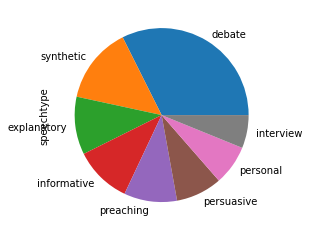

In [48]:
df_uni.speechtype.value_counts().plot(kind='pie')

Pie chart indicating the distribution between human and synthetic voices:

<AxesSubplot:ylabel='speakertype'>

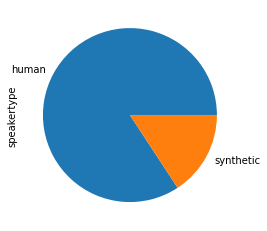

In [49]:
df_uni.speakertype.value_counts().plot(kind='pie')

In [50]:
df_preach = df_uni[df_uni.speechtype=='preaching']
df_debate = df_uni[df_uni.speechtype=='debate']

In [51]:
def get_feats(df):
    return mld_df[mld_df.index.isin(df.index)]
feats_preach = get_feats(df_preach)
feats_debate = get_feats(df_debate)

In [52]:
feats_preach.shape

(77, 580)

A boxplot comparing the speech types of "preaching" and "debate", where we can see that the speechrate in debates was higher than in preaches:

<AxesSubplot:>

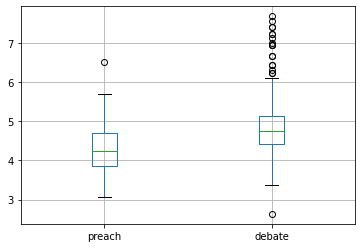

In [53]:
pd.concat([feats_preach['hld_sylRate'].rename('preach'), 
           feats_debate['hld_sylRate'].rename('debate')], axis=1).boxplot()

Pie chart displaying the distribution of languages:

<AxesSubplot:ylabel='lang'>

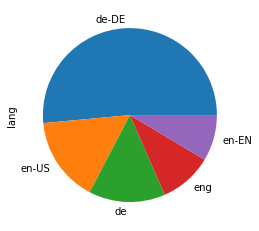

In [54]:
df_uni.lang.value_counts().plot(kind='pie')

### Supplementary plots

We did not get further within the course, but it was quite interesting what one could see:

<AxesSubplot:>

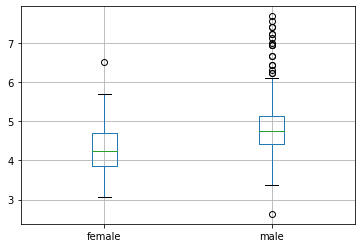

In [55]:
pd.concat([feats_preach['hld_sylRate'].rename('female'), 
           feats_debate['hld_sylRate'].rename('male')], axis=1).boxplot()

<AxesSubplot:xlabel='age', ylabel='gender'>

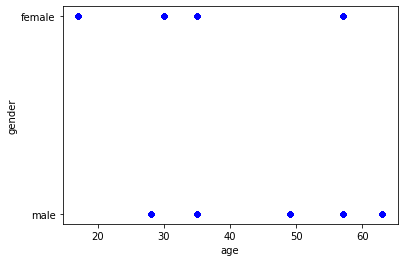

In [56]:
df_uni.plot.scatter(y='gender', x='age', c='blue')

The following function creates two more dataframes, df_explanatory and df_informative, to continue the analysis. Again, these were filtered according to the df.speechtype. 

In [57]:
df_explanatory = df_uni[df_uni.speechtype=='explanatory']
df_informative = df_uni[df_uni.speechtype=='informative']

In [58]:
def get_feats(df):
    return mld_df[mld_df.index.isin(df.index)]
feats_explanatory = get_feats(df_explanatory)
feats_informative = get_feats(df_informative)

Boxplot comparing the speechrate between informative talks and debates:

<AxesSubplot:>

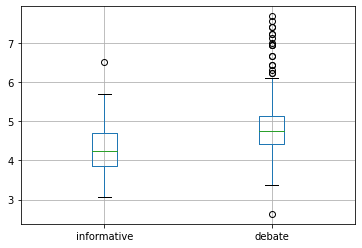

In [59]:
pd.concat([feats_preach['hld_sylRate'].rename('informative'), 
           feats_debate['hld_sylRate'].rename('debate')], axis=1).boxplot()

<AxesSubplot:>

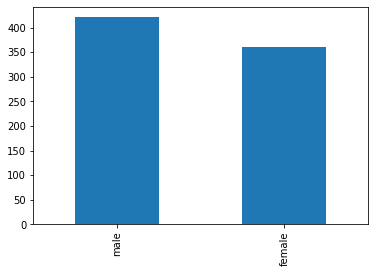

In [61]:
df_uni.gender.value_counts().plot(kind='bar')

<AxesSubplot:>

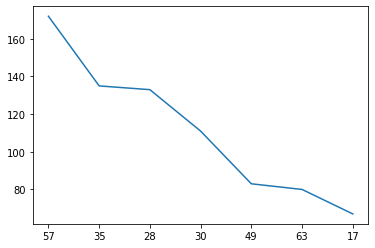

In [62]:
df_uni.age.value_counts().plot(kind='line')

<AxesSubplot:>

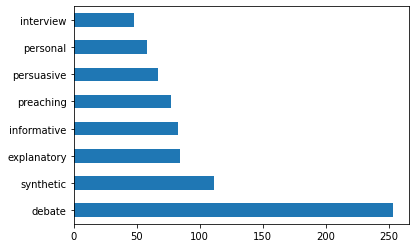

In [63]:
df_uni.speechtype.value_counts().plot(kind='barh')

<AxesSubplot:>

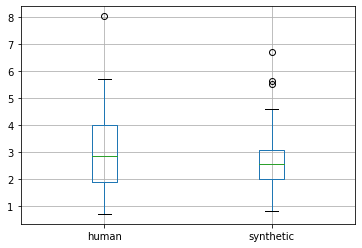

In [64]:
pd.concat([feats_preach['reg_rng_mean'].rename('human'), 
           feats_debate['reg_rng_mean'].rename('synthetic')], axis=1).boxplot()